In [1]:
import cmocean
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
import numpy as np

/home/maltem/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
mpath = "/lustre/storeB/project/nwp/SALIENSEAS/SvalMIZ2024/models/"

In [31]:
def plot_forecastStats(metric,var,LabelText,cmin,cmax,cmapc):

    models = ['ECMWF-IFS', 'ECMWF-AIFS','DWD-ICON','MF-ARPEGE', 'MF-AROME',  'MET_AROMEArctic',  'ECCC-HRDPSN' ]
    
    if var=='T2M':
        selvar = ['T2M',       '2t',         '2t',     'T_2M', 'T_2M', 'air_temperature_2m'  ]
        fac = 1.
    if var=='SIC':
        selvar = [ 'CI',     ''        ,  'ci'    ,'F_ICE', 'F_ICE' ,  'SFX_SIC']
        fac = 100.
    if var=='SIT':
        selvar = [ 'var98',     ''        ,  'icetk'    ,'H_ICE','H_ICE', 'SFX_ICE_THK' ,  '']
        fac = 1.
    
    
    
    print(selvar)
    plot_proj = ccrs.Orthographic(14,25)

  

    fig, ax = plt.subplots(figsize=(15, 7),nrows=2,ncols=3,
                       subplot_kw={'projection': plot_proj})

    for k in range(2):
        for l in range(3):        
            i=k*3+l
        
            if selvar[i]:
        
                ifile = mpath + models[i]+'/48h_'+metric+'.'+models[i]+'_202404.nc'
                fc = xr.open_dataset(ifile);
                ax[k,l].coastlines(resolution='50m')
                ax[k,l].set_extent([-10, 30, 67, 88], crs=ccrs.PlateCarree())
                plotvar = np.squeeze(fc[selvar[i]])*fac
    
                if models[i] == 'MF-AROME':
                    ifile2 = mpath + models[i]+'/AROME_SVALBARD_202404210000_202404221100.nc'
                    fc2 = xr.open_dataset(ifile2);
                    contour1 = ax[k,l].pcolormesh(fc2.Longitude.values, fc2.Latitude.values, plotvar, transform=ccrs.PlateCarree(), cmap=cmapc, vmax = cmax, vmin = cmin,alpha=1)
                    fc2.close()
                elif models[i] == 'MF-ARPEGE':
                    ifile2 = mpath + models[i]+'/ARPEGE_SVALBARD_202404210000_202404221100.nc'
                    fc2 = xr.open_dataset(ifile2);
                    contour1 = ax[k,l].pcolormesh(fc2.Longitude.values, fc2.Latitude.values, plotvar, transform=ccrs.PlateCarree(), cmap=cmapc, vmax = cmax, vmin = cmin,alpha=1)
                    fc2.close()
    
                elif models[i] == 'MET_AROMEArctic':
                    contour1 = ax[k,l].pcolormesh(fc.longitude, fc.latitude, plotvar, transform=ccrs.PlateCarree(), cmap=cmapc, vmax = cmax, vmin = cmin,alpha=1)
    
                else:
                    contour1 = ax[k,l].pcolormesh(fc.lon, fc.lat, plotvar, transform=ccrs.PlateCarree(), cmap=cmapc, vmax = cmax, vmin = cmin,alpha=1)
    
                ax[k,l].set_title(models[i])
                fc.close()
    plt.subplots_adjust(wspace=0.1, hspace=0.1)        
    cbar = fig.colorbar(contour1, ax=ax,location = 'right')
    #plt.subplots_adjust(wspace=0.1, hspace=0.1)
    #plt.tight_layout() 
    cbar.set_label(LabelText, fontsize=12)
    
    

['var98', '', 'icetk', 'H_ICE', 'H_ICE', 'SFX_ICE_THK', '']


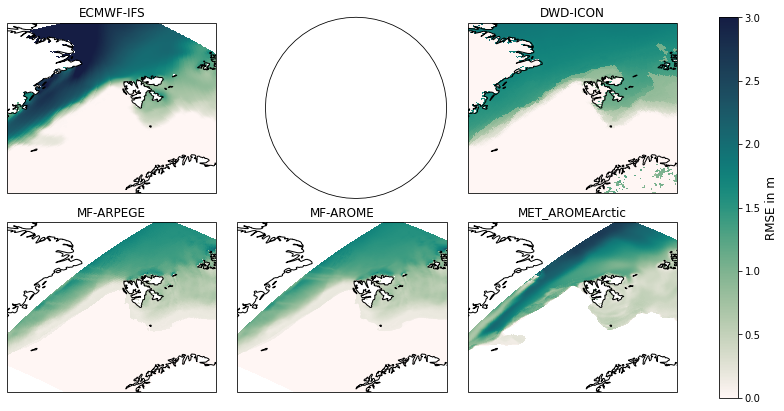

In [32]:
plot_forecastStats('mean','SIT','RMSE in m',0,3,cmocean.cm.tempo)

['CI', '', 'ci', 'F_ICE', 'F_ICE', 'SFX_SIC']


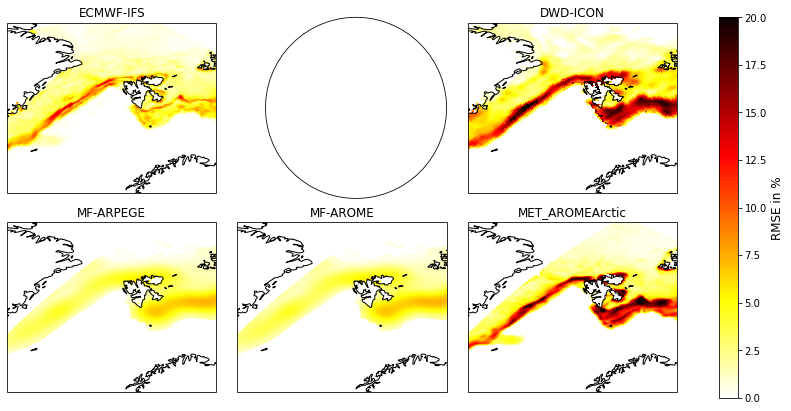

In [29]:
plot_forecastStats('rmse','SIC','RMSE in %',0,20,cm.hot_r)

['T2M', '2t', '2t', 'T_2M', 'T_2M', 'air_temperature_2m']


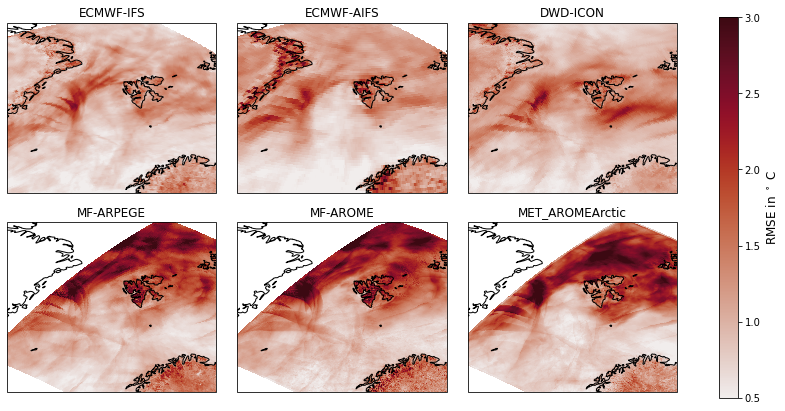

In [33]:
plot_forecastStats('rmse','T2M','RMSE in $^\circ$ C',0.5,3,cmocean.cm.amp)

['T2M', '2t', '2t', 'T_2M', 'T_2M', 'air_temperature_2m']


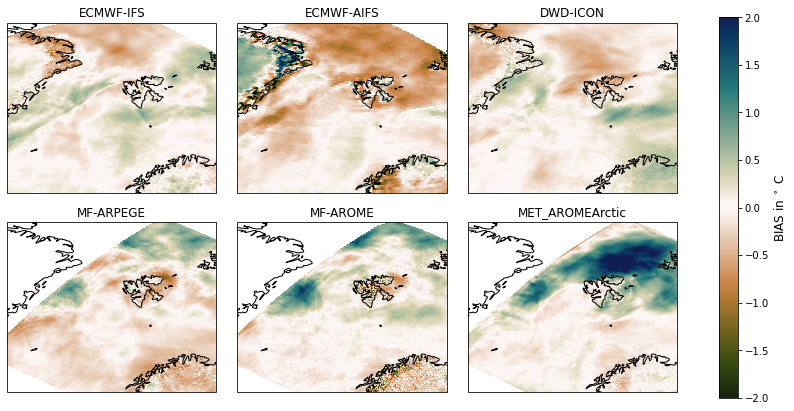

In [34]:
plot_forecastStats('bias','T2M','BIAS in $^\circ$ C',-2,2,cmocean.cm.tarn)